In [3]:
import cv2, os
import numpy as np
cam = cv2.VideoCapture(0)
detector=cv2.CascadeClassifier('C:\\Users\\DELL\\face_model\\xml\\frontal_face.xml')

In [ ]:
Id=input('enter your id: ')
sampleNum=0
os.mkdir("people/"+Id.lower())

In [ ]:
while(True):
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image= np.array(gray, 'uint8')
    faces = detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        
        #incrementing sample number 
        sampleNum=sampleNum+1
        #saving the captured face in the dataset folder
        #cv2.imwrite()
        cv2.imwrite("people/"+Id.lower() + '/' + str(sampleNum) + ".jpg", image[y:y+h,x:x+w]) #

        cv2.imshow('frame',img)
    #wait for 100 miliseconds 
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    # break if the sample number is morethan 20
    elif sampleNum>20:
        break
cam.release()    
cv2.destroyAllWindows()

In [4]:
cam.release()

In [5]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    size=(47,62)
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("people/")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("people/" + person):
            if image.endswith('.jpg'):
                img=cv2.imread("people/" + person + '/' + image, 0)
                images.append(cv2.resize(img, size)) 
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [6]:
images, labels, labels_dic = collect_dataset()

In [7]:
print (len(images))
print (labels_dic)

60
{0: 'ishita', 1: 'satyam', 2: 'unknown'}


In [8]:
X_train=np.asarray(images)
Y_train=labels

In [9]:
X_train.shape

(60, 62, 47)

In [10]:
Y_train.shape

(60,)

In [11]:
X_train.dtype

dtype('uint8')

In [12]:
train=X_train.reshape(len(X_train),-1)

In [13]:
train.shape

(60, 2914)

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

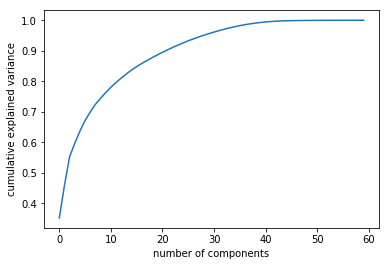

In [15]:
pca1 = PCA()
pca1.fit(train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [16]:
pca1 = PCA()

In [17]:
def test_dataset():
    images = []
    labels = []
    labels_dic = {}
    size=(47,62)
    #people = [person for person in os.listdir("Male_female/")]
    people = [person for person in os.listdir("people/")]
    #people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("people/" + person):
            if image.endswith('.jpg'):
                img=cv2.imread("people/" + person + '/' + image, 0)
                images.append(cv2.resize(img, size)) 
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [18]:
images, labels, labels_dic = test_dataset()

In [19]:
len(images)

60

In [20]:
labels_dic

{0: 'ishita', 1: 'satyam', 2: 'unknown'}

In [21]:
X_test= np.asarray(images)

In [22]:
X_test.shape

(60, 62, 47)

In [23]:
test=X_test.reshape(len(X_test),-1)

In [24]:
test.shape

(60, 2914)

In [25]:
Y_test=labels
Y_test.shape

(60,)

In [26]:
np.unique(Y_test)

array([0, 1, 2])

In [27]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_ntrain=sc.fit_transform(train)
X_ntest= sc.transform(test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
pca1.n_components
new_train=pca1.fit_transform(X_ntrain)

In [29]:
new_train.shape

(60, 60)

In [30]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', probability=True)
svm.fit(new_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svm.score(pca1.transform(X_ntest), Y_test)

1.0

In [32]:
pred=svm.predict(pca1.transform(X_ntest))

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

1.0

In [34]:
import pickle

filename = 'svc_face.pkl'
f=open(filename, 'wb')
pickle.dump(svm,f)

f.close()

In [35]:
filename = 'pca_face.pkl'
f=open(filename, 'wb')
pickle.dump(pca1,f)
 

f.close()

In [36]:
filename = 'sc_face.pkl'
f=open(filename, 'wb')
pickle.dump(sc,f)
 

f.close()

In [37]:
filename='labels.pkl'
f=open(filename,'wb')
pickle.dump(labels_dic,f)
f.close()